In [1]:
import os
seed = 10
os.environ['PYTHONHASHSEED']=str(seed)

In [2]:
import requests
import lxml
import datetime as dt
import pandas as pd
import pandas_datareader.data as web
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.utils import compute_class_weight
import tensorflow as tf
from pil import Image
from sklearn import preprocessing
import tensorflow_addons as tfa

count = 0

In [3]:
seed = 10
df = pd.read_csv("data/cyclic_tickers/initial_indicators/ANF_data.csv")
df.set_index('Date', inplace=True)
df.head()

,previous_1d,EMA_12,willr_14,OBV_7,labels
Date,,,,,
2000-01-21,21.5000,24.211693,-82.142857,-6805500.0,2.0
2000-01-24,20.2500,23.602201,-92.465753,-8986800.0,1.0
2000-01-25,20.1875,23.076863,-92.307692,-11383100.0,2.0
2000-01-26,20.8750,22.738115,-82.786885,-9392500.0,2.0
2000-01-27,22.8750,22.759174,-56.557377,-6811000.0,2.0


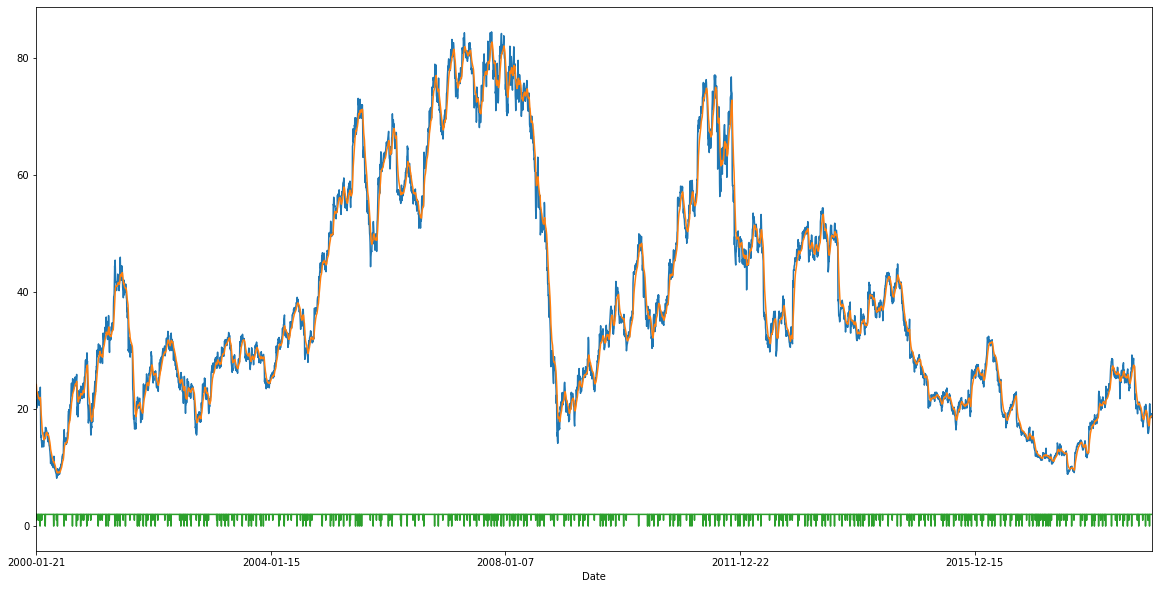

In [4]:
#%matplotlib notebook
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

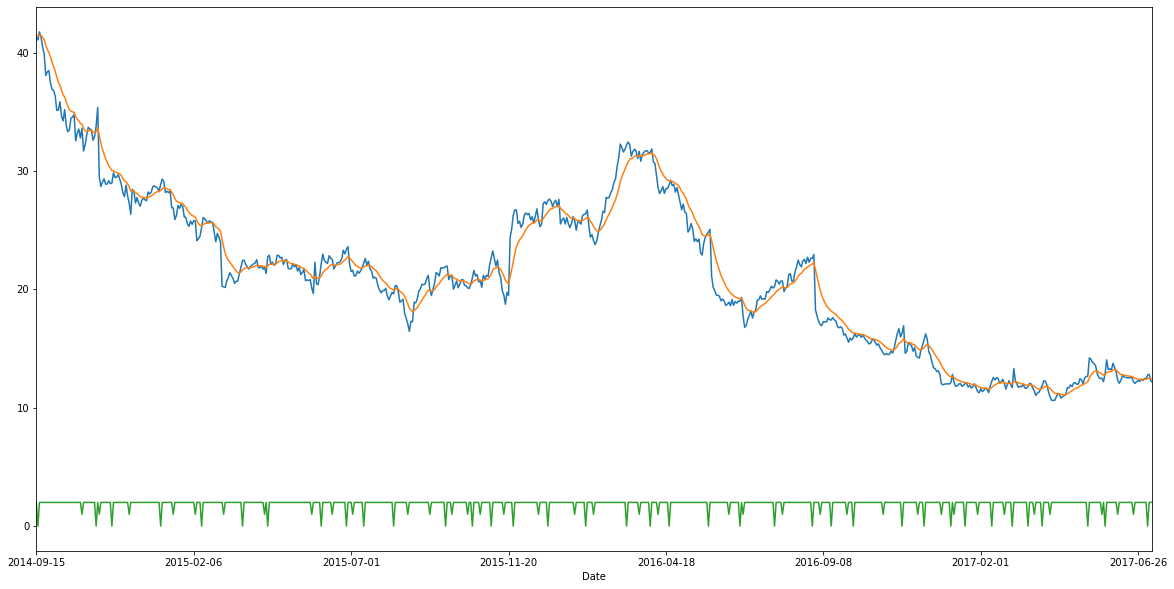

In [5]:
df = df.loc['2014-09-15':'2017-07-10']
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

In [6]:
df.to_csv('mark down phase data/{}_acc_data.csv'.format(str(count)))
count += 1 

In [7]:
acc_df = df
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 710 entries, 2014-09-15 to 2017-07-10
Data columns (total 5 columns):
previous_1d    710 non-null float64
EMA_12         710 non-null float64
willr_14       710 non-null float64
OBV_7          710 non-null float64
labels         710 non-null float64
dtypes: float64(5)
memory usage: 33.3+ KB


In [10]:
df = pd.read_csv("data/cyclic_tickers/initial_indicators/600104.SS_data_down.csv")
df.set_index('Date', inplace=True)
df.head()

,previous_1d,EMA_12,willr_14,OBV_7,labels
Date,,,,,
2018-01-22,32.830002,32.653718,-49.494874,128764966.0,2.0
2018-01-23,33.750000,32.822377,-18.518497,165063463.0,2.0
2018-01-24,33.970001,32.998934,-16.190425,201240854.0,2.0
2018-01-25,33.959999,33.146790,-17.627141,173336178.0,2.0
2018-01-26,34.880001,33.413438,-2.648942,221767625.0,0.0


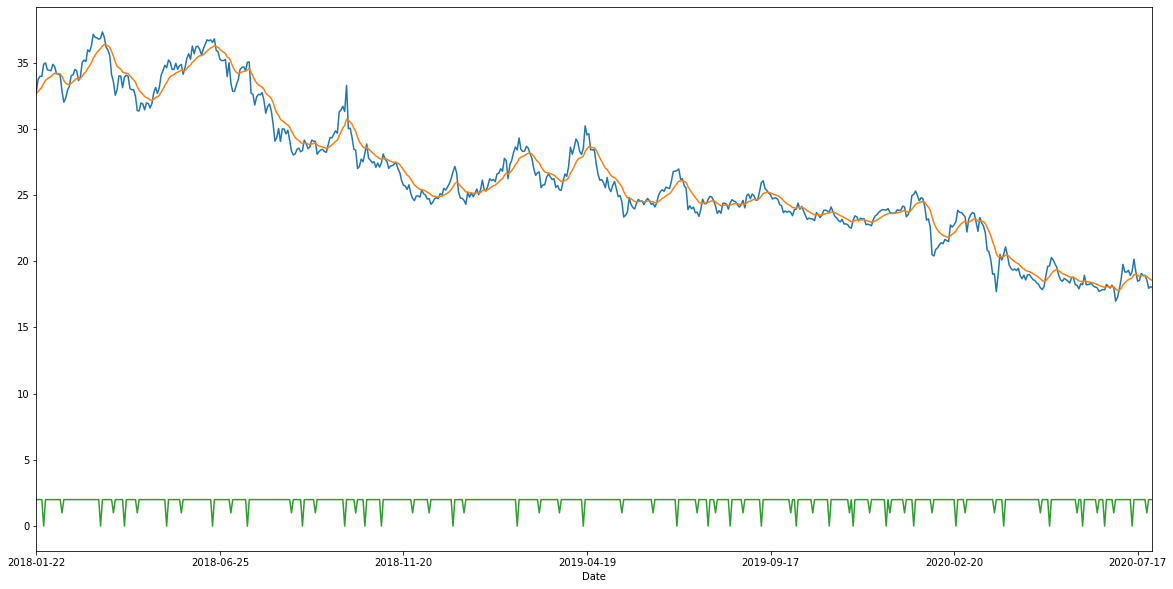

In [11]:
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

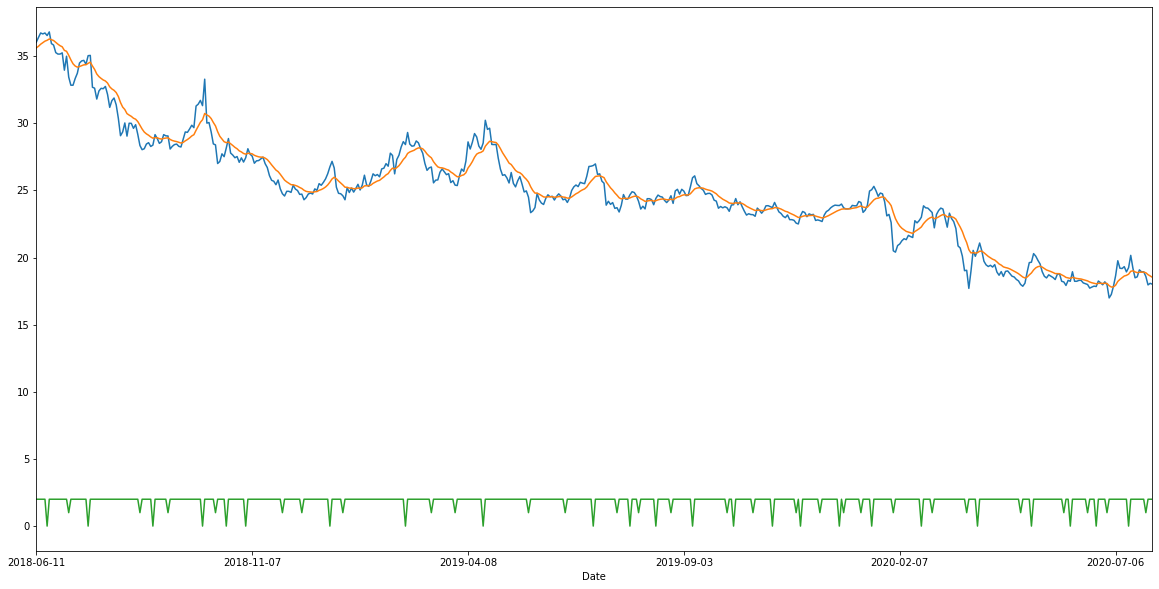

In [12]:
df = df.loc['2018-06-10':]
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

In [13]:
df.to_csv('mark down phase data/{}_acc_data.csv'.format(str(count)))
count += 1 

In [14]:
acc_df = pd.concat([acc_df,df])
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1228 entries, 2014-09-15 to 2020-07-29
Data columns (total 5 columns):
previous_1d    1228 non-null float64
EMA_12         1228 non-null float64
willr_14       1228 non-null float64
OBV_7          1228 non-null float64
labels         1228 non-null float64
dtypes: float64(5)
memory usage: 57.6+ KB


In [15]:
df = pd.read_csv("data/cyclic_tickers/initial_indicators/O39.SI_data.csv")
df.set_index('Date', inplace=True)
df.head()

,previous_1d,EMA_12,willr_14,OBV_7,labels
Date,,,,,
2000-01-21,6.793788,7.018572,-90.000010,-1965914.0,2.0
2000-01-24,6.890842,6.998922,-77.777802,6276910.0,2.0
2000-01-25,6.793788,6.967363,-85.714286,-511055.0,2.0
2000-01-26,6.745261,6.933193,-86.666549,-7435027.0,2.0
2000-01-27,6.890842,6.926678,-66.666601,-3725757.0,2.0


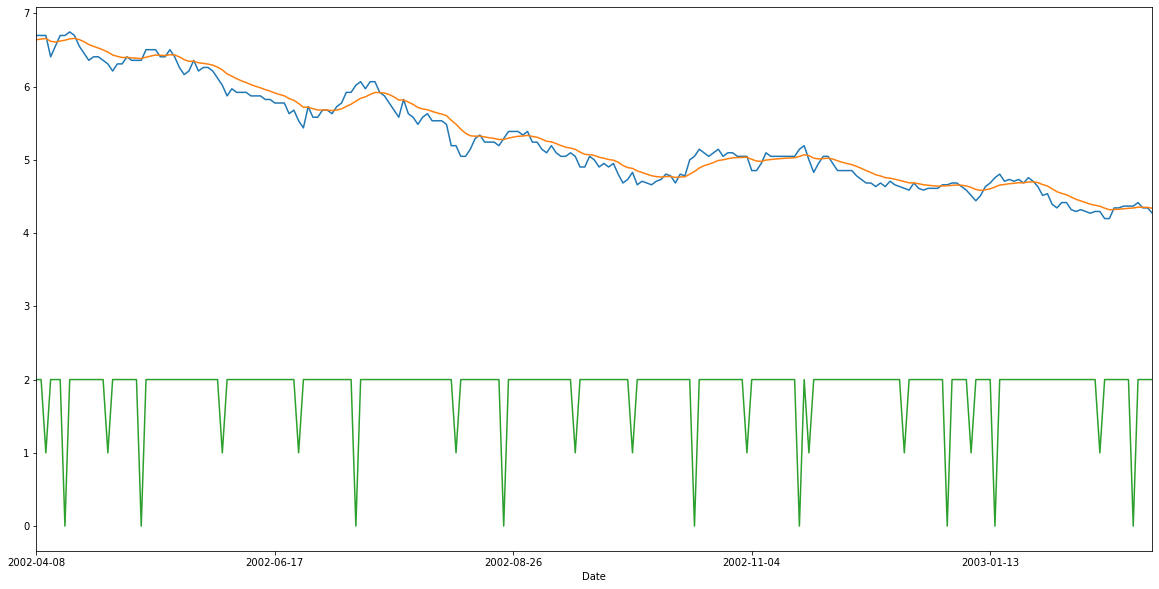

In [16]:
df = df.loc['2002-04-07':'2003-03-02']
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

In [17]:
df.to_csv('mark down phase data/{}_acc_data.csv'.format(str(count)))
count += 1 

In [18]:
acc_df = pd.concat([acc_df,df])
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1463 entries, 2014-09-15 to 2003-02-28
Data columns (total 5 columns):
previous_1d    1463 non-null float64
EMA_12         1463 non-null float64
willr_14       1463 non-null float64
OBV_7          1463 non-null float64
labels         1463 non-null float64
dtypes: float64(5)
memory usage: 68.6+ KB


In [19]:
df = pd.read_csv("data/cyclic_tickers/initial_indicators/C_data.csv")
df.set_index('Date', inplace=True)
df.head()

,previous_1d,EMA_12,willr_14,OBV_7,labels
Date,,,,,
2000-01-21,439.570312,417.946098,-14.264706,3317480.0,2.0
2000-01-24,423.281250,418.766891,-34.705882,1769520.0,2.0
2000-01-25,413.906250,418.019100,-46.470588,626307.0,2.0
2000-01-26,419.062500,418.179623,-40.000000,2168174.0,2.0
2000-01-27,435.937500,420.911604,-22.535211,3502561.0,2.0


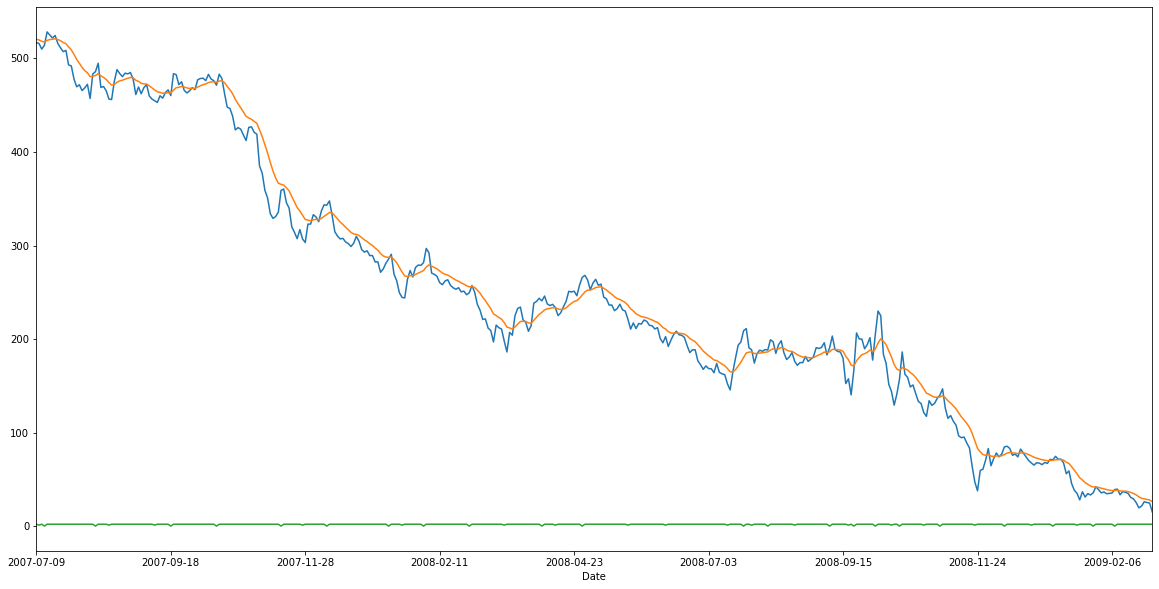

In [20]:
df = df.loc['2007-07-09':'2009-03-02']
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

In [21]:
df.to_csv('mark down phase data/{}_acc_data.csv'.format(str(count)))
count += 1 

In [22]:
acc_df = pd.concat([acc_df,df])
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1879 entries, 2014-09-15 to 2009-03-02
Data columns (total 5 columns):
previous_1d    1879 non-null float64
EMA_12         1879 non-null float64
willr_14       1879 non-null float64
OBV_7          1879 non-null float64
labels         1879 non-null float64
dtypes: float64(5)
memory usage: 88.1+ KB


In [23]:
df = pd.read_csv("data/cyclic_tickers/initial_indicators/C6L.SI_data.csv")
df.set_index('Date', inplace=True)
df.head()

,previous_1d,EMA_12,willr_14,OBV_7,labels
Date,,,,,
2000-01-21,19.000000,19.215335,-37.499990,388000.0,2.0
2000-01-24,18.400000,19.089899,-50.000000,-2311000.0,2.0
2000-01-25,18.100000,18.937607,-48.780483,-3542000.0,2.0
2000-01-26,17.700001,18.747206,-85.714237,-6261000.0,2.0
2000-01-27,17.799999,18.601482,-82.142864,-4565000.0,2.0


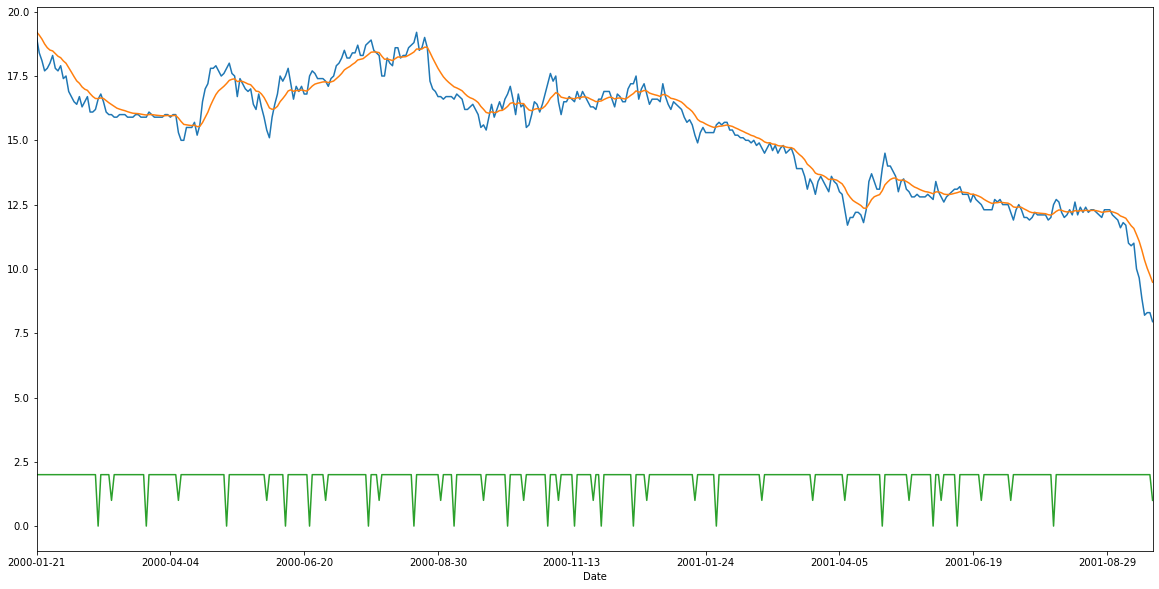

In [24]:
df = df.loc[:'2001-09-23']
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

In [25]:
df.to_csv('mark down phase data/{}_acc_data.csv'.format(str(count)))
count += 1 

In [26]:
acc_df = pd.concat([acc_df,df])
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2297 entries, 2014-09-15 to 2001-09-21
Data columns (total 5 columns):
previous_1d    2297 non-null float64
EMA_12         2297 non-null float64
willr_14       2297 non-null float64
OBV_7          2297 non-null float64
labels         2297 non-null float64
dtypes: float64(5)
memory usage: 107.7+ KB


In [29]:
df = pd.read_csv("data/cyclic_tickers/initial_indicators/0883.HK_data.csv")
df.set_index('Date', inplace=True)
df.head()

,previous_1d,EMA_12,willr_14,OBV_7,labels
Date,,,,,
2004-04-07,3.250,3.264699,-57.142857,31539206.0,2.0
2004-04-08,3.200,3.254745,-78.947368,-24878594.0,2.0
2004-04-13,3.250,3.254015,-52.631579,10937473.0,0.0
2004-04-14,3.375,3.272628,-10.416706,98972973.0,2.0
2004-04-15,3.275,3.272993,-52.083331,47190715.0,2.0


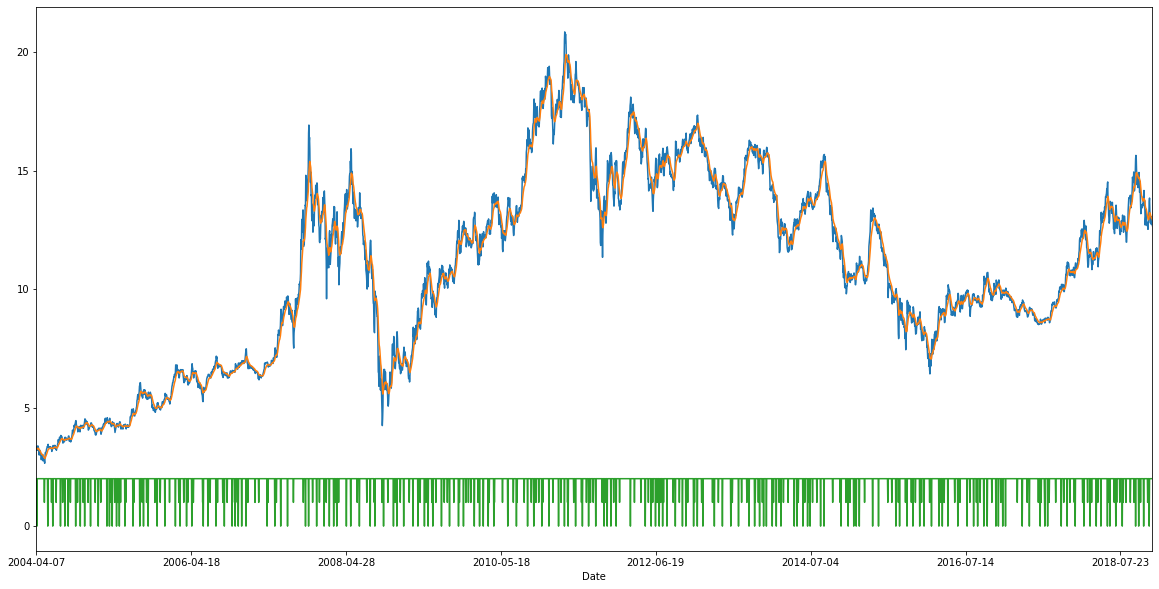

In [30]:
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

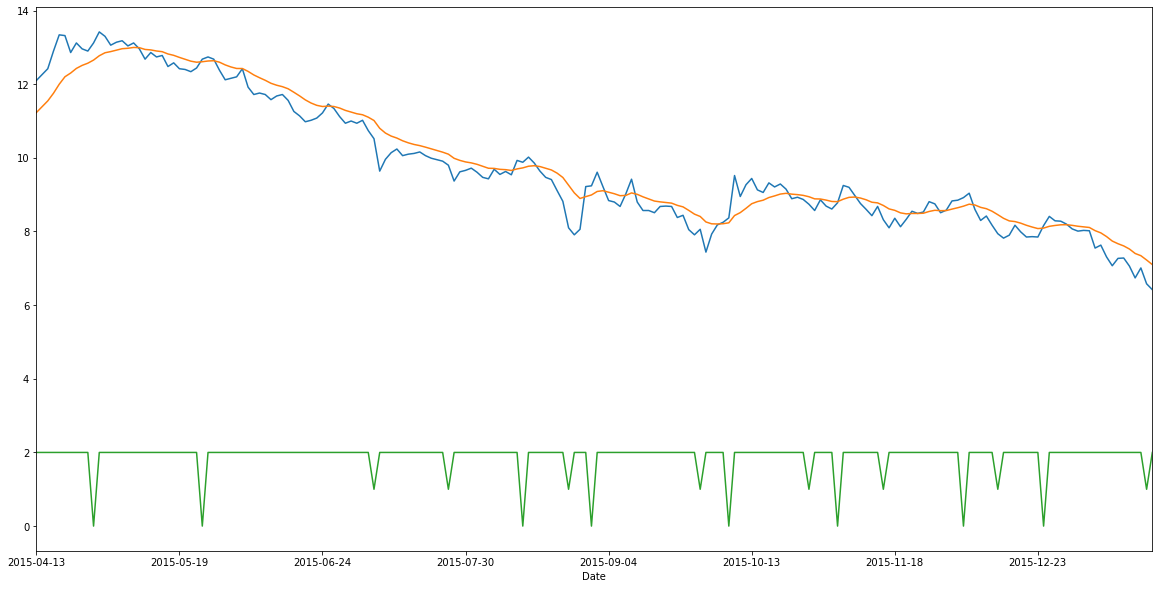

In [31]:
df = df.loc['2015-04-12':'2016-01-24']
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

In [32]:
df.to_csv('mark down phase data/{}_acc_data.csv'.format(str(count)))
count += 1 

In [33]:
acc_df = pd.concat([acc_df,df])
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2493 entries, 2014-09-15 to 2016-01-22
Data columns (total 5 columns):
previous_1d    2493 non-null float64
EMA_12         2493 non-null float64
willr_14       2493 non-null float64
OBV_7          2493 non-null float64
labels         2493 non-null float64
dtypes: float64(5)
memory usage: 116.9+ KB


In [37]:
df = pd.read_csv("data/cyclic_tickers/initial_indicators/1398.HK_data_test2.csv")
df.set_index('Date', inplace=True)
df.head()

,previous_1d,EMA_12,willr_14,OBV_7,labels
Date,,,,,
2020-01-22,5.63,5.865838,-100.000000,-1.173373e+09,2.0
2020-01-23,5.70,5.840325,-85.106441,-1.050063e+09,2.0
2020-01-24,5.64,5.809505,-90.697690,-1.182421e+09,2.0
2020-01-29,5.62,5.780351,-91.111125,-1.235873e+09,2.0
2020-01-30,5.40,5.721835,-89.999980,-1.489349e+09,2.0


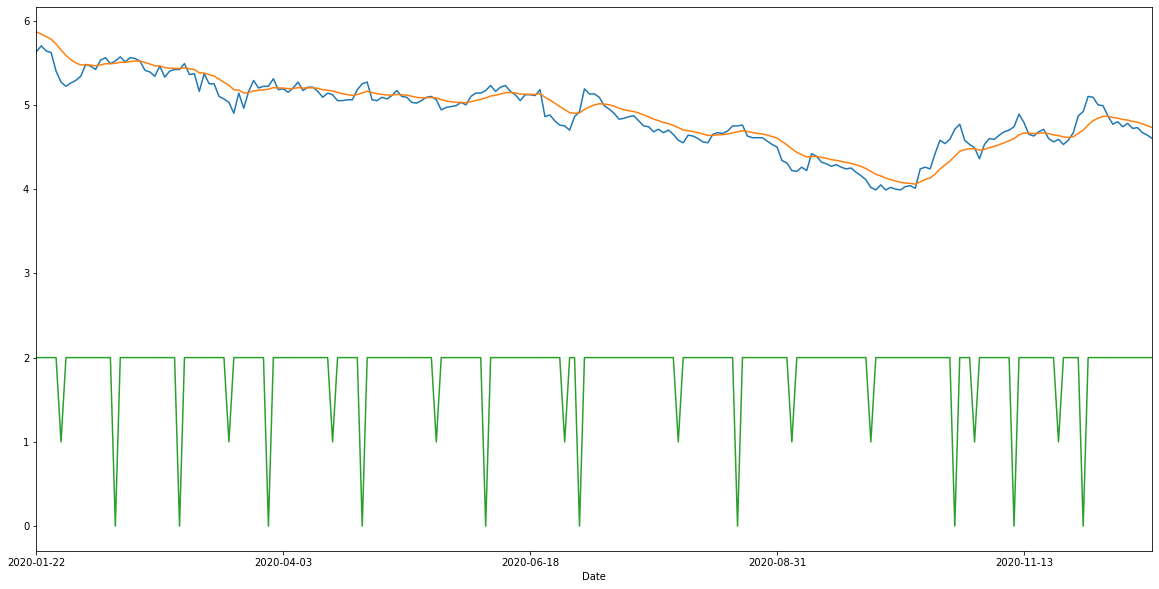

In [38]:
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

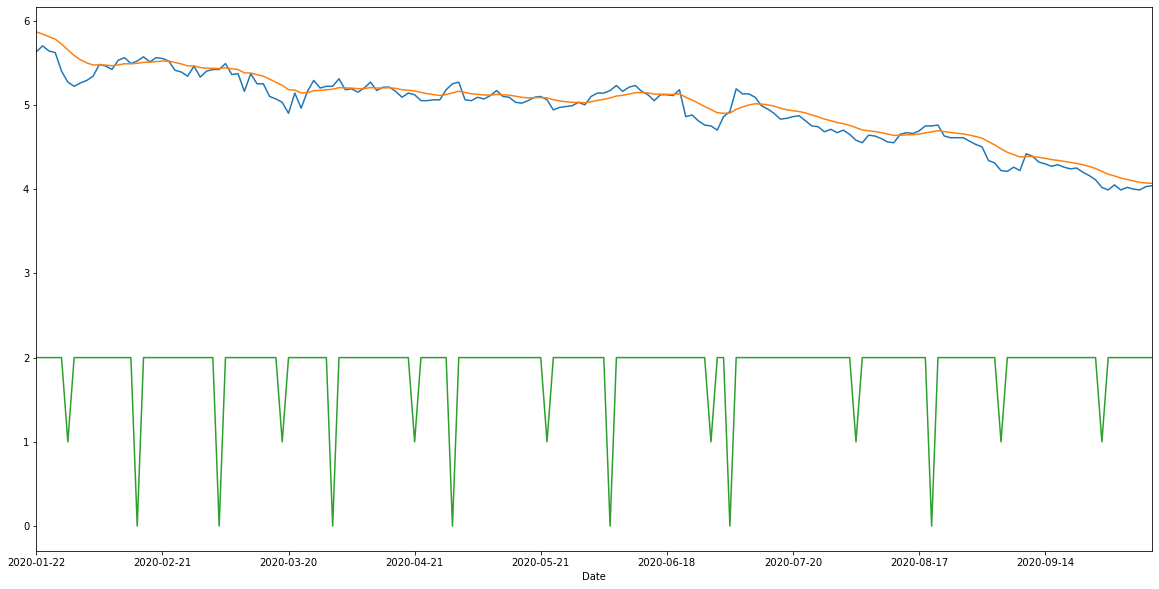

In [39]:
df = df.loc[:'2020-10-11']
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

In [40]:
df.to_csv('mark down phase data/{}_acc_data.csv'.format(str(count)))
count += 1 

In [41]:
acc_df = pd.concat([acc_df,df])
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2671 entries, 2014-09-15 to 2020-10-09
Data columns (total 5 columns):
previous_1d    2671 non-null float64
EMA_12         2671 non-null float64
willr_14       2671 non-null float64
OBV_7          2671 non-null float64
labels         2671 non-null float64
dtypes: float64(5)
memory usage: 125.2+ KB


In [42]:
df = pd.read_csv("data/cyclic_tickers/initial_indicators/F_data.csv")
df.set_index('Date', inplace=True)
df.head()

,previous_1d,EMA_12,willr_14,OBV_7,labels
Date,,,,,
2000-01-21,28.696527,28.933312,-60.897434,-10551829.0,2.0
2000-01-24,27.717651,28.746288,-97.435894,-19556923.0,2.0
2000-01-25,28.095465,28.646161,-83.333274,-11634726.0,2.0
2000-01-26,27.545919,28.476893,-83.505131,-18162314.0,1.0
2000-01-27,26.378138,28.154008,-91.269808,-32689253.0,2.0


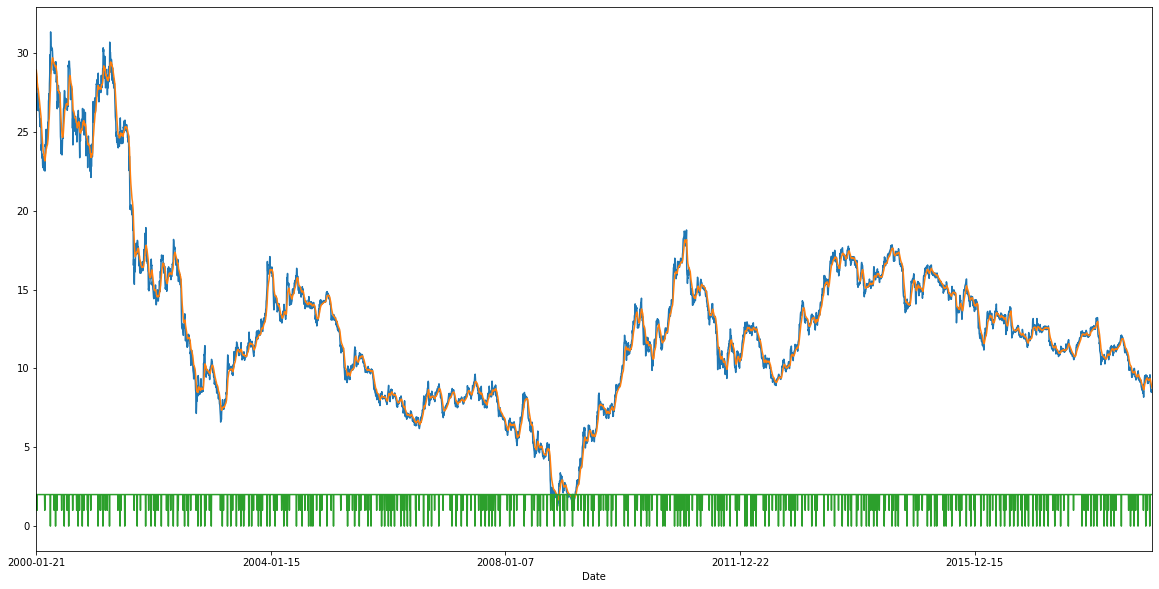

In [43]:
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

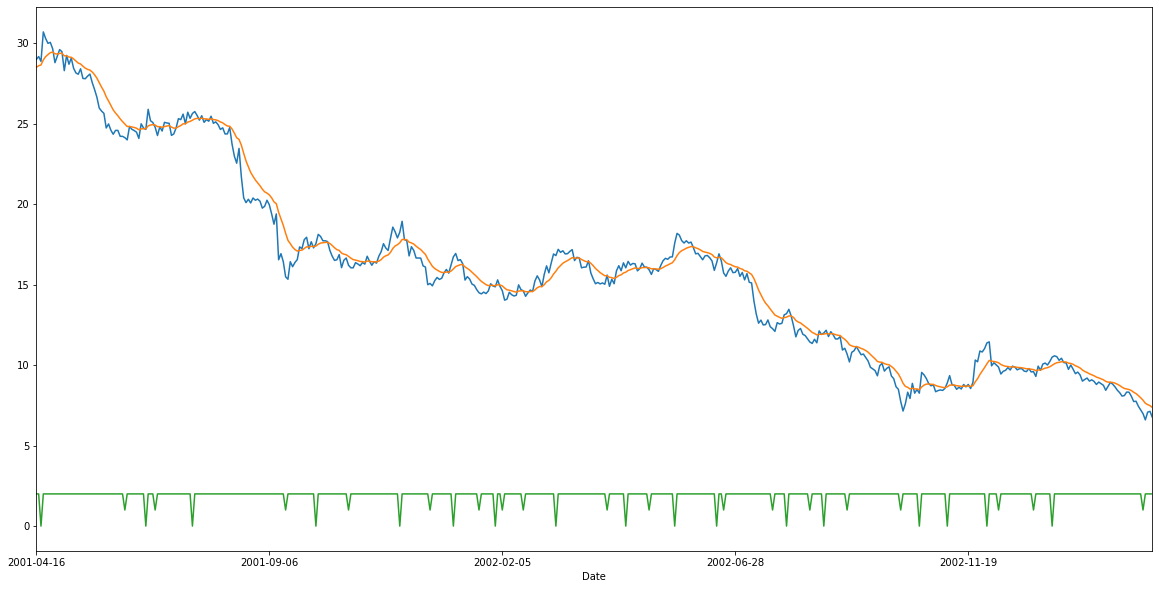

In [44]:
df = df.loc['2001-04-16':'2003-03-17']
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

In [45]:
df.to_csv('mark down phase data/{}_acc_data.csv'.format(str(count)))
count += 1 

In [46]:
acc_df = pd.concat([acc_df,df])
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3151 entries, 2014-09-15 to 2003-03-17
Data columns (total 5 columns):
previous_1d    3151 non-null float64
EMA_12         3151 non-null float64
willr_14       3151 non-null float64
OBV_7          3151 non-null float64
labels         3151 non-null float64
dtypes: float64(5)
memory usage: 147.7+ KB


In [47]:
df = pd.read_csv("data/cyclic_tickers/initial_indicators/F_data.csv")
df.set_index('Date', inplace=True)
df.head()

,previous_1d,EMA_12,willr_14,OBV_7,labels
Date,,,,,
2000-01-21,28.696527,28.933312,-60.897434,-10551829.0,2.0
2000-01-24,27.717651,28.746288,-97.435894,-19556923.0,2.0
2000-01-25,28.095465,28.646161,-83.333274,-11634726.0,2.0
2000-01-26,27.545919,28.476893,-83.505131,-18162314.0,1.0
2000-01-27,26.378138,28.154008,-91.269808,-32689253.0,2.0


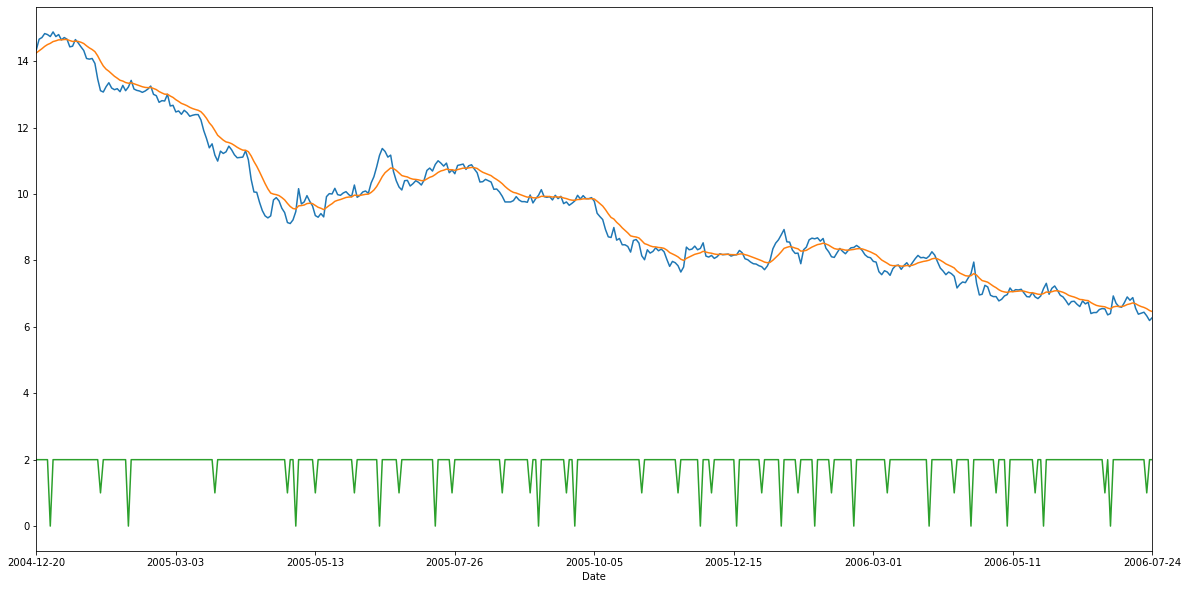

In [48]:
df = df.loc['2004-12-20':'2006-07-24']
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

In [49]:
df.to_csv('mark down phase data/{}_acc_data.csv'.format(str(count)))
count += 1 

In [50]:
acc_df = pd.concat([acc_df,df])
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3552 entries, 2014-09-15 to 2006-07-24
Data columns (total 5 columns):
previous_1d    3552 non-null float64
EMA_12         3552 non-null float64
willr_14       3552 non-null float64
OBV_7          3552 non-null float64
labels         3552 non-null float64
dtypes: float64(5)
memory usage: 166.5+ KB


In [51]:
df = pd.read_csv("data/cyclic_tickers/initial_indicators/F_data.csv")
df.set_index('Date', inplace=True)
df.head()

,previous_1d,EMA_12,willr_14,OBV_7,labels
Date,,,,,
2000-01-21,28.696527,28.933312,-60.897434,-10551829.0,2.0
2000-01-24,27.717651,28.746288,-97.435894,-19556923.0,2.0
2000-01-25,28.095465,28.646161,-83.333274,-11634726.0,2.0
2000-01-26,27.545919,28.476893,-83.505131,-18162314.0,1.0
2000-01-27,26.378138,28.154008,-91.269808,-32689253.0,2.0


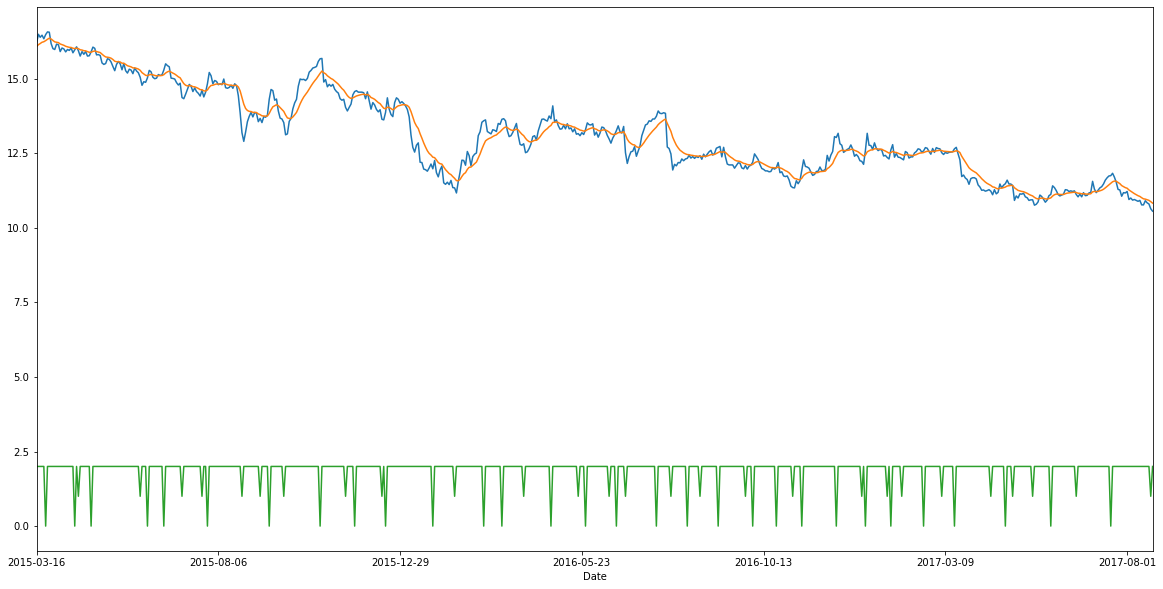

In [52]:
df = df.loc['2015-03-16':'2017-08-21']
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

In [53]:
df.to_csv('mark down phase data/{}_acc_data.csv'.format(str(count)))
count += 1 

In [54]:
acc_df = pd.concat([acc_df,df])
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4167 entries, 2014-09-15 to 2017-08-21
Data columns (total 5 columns):
previous_1d    4167 non-null float64
EMA_12         4167 non-null float64
willr_14       4167 non-null float64
OBV_7          4167 non-null float64
labels         4167 non-null float64
dtypes: float64(5)
memory usage: 195.3+ KB


In [58]:
df = pd.read_csv("data/cyclic_tickers/initial_indicators/GM_data.csv")
df.set_index('Date', inplace=True)
df.head()

,previous_1d,EMA_12,willr_14,OBV_7,labels
Date,,,,,
2010-12-09,34.450001,34.250232,-52.739722,581566100.0,2.0
2010-12-10,33.740002,34.171735,-64.921359,563163900.0,2.0
2010-12-13,33.810001,34.116083,-61.256454,574905600.0,2.0
2010-12-14,33.799999,34.067455,-61.780126,563876300.0,2.0
2010-12-15,33.889999,34.040154,-57.068075,579041900.0,1.0


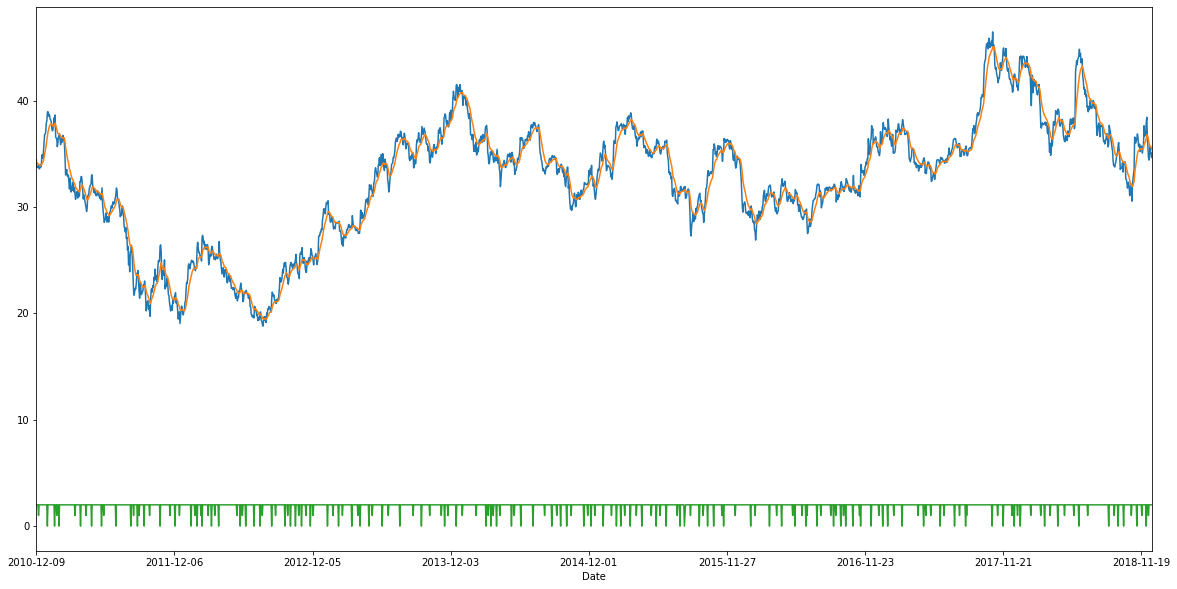

In [59]:
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

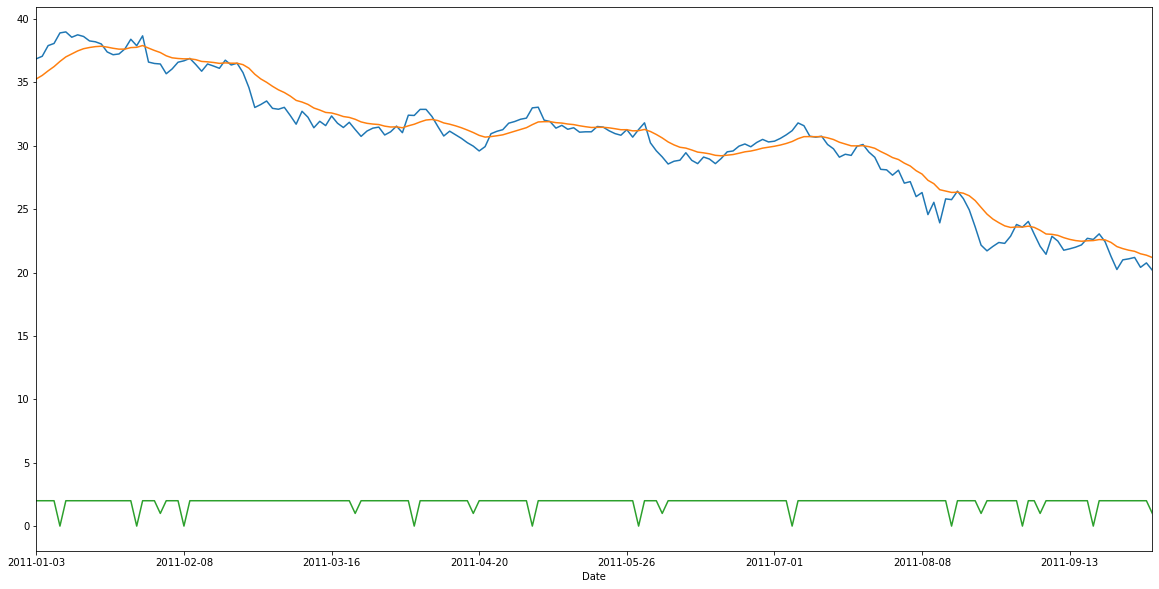

In [60]:
df = df.loc['2011-01-03':'2011-10-03']
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

In [61]:
df.to_csv('mark down phase data/{}_acc_data.csv'.format(str(count)))
count += 1 

In [62]:
acc_df = pd.concat([acc_df,df])
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4357 entries, 2014-09-15 to 2011-10-03
Data columns (total 5 columns):
previous_1d    4357 non-null float64
EMA_12         4357 non-null float64
willr_14       4357 non-null float64
OBV_7          4357 non-null float64
labels         4357 non-null float64
dtypes: float64(5)
memory usage: 204.2+ KB


## Test Set

In [63]:
df = pd.read_csv("data/cyclic_tickers/initial_indicators/GS_data.csv")
df.set_index('Date', inplace=True)
df.head()

,previous_1d,EMA_12,willr_14,OBV_7,labels
Date,,,,,
2000-01-21,85.9375,85.447978,-53.992395,1493500.0,2.0
2000-01-24,85.6875,85.484828,-54.296875,951000.0,1.0
2000-01-25,81.7500,84.910239,-69.318182,238100.0,2.0
2000-01-26,83.8750,84.750971,-50.000000,987400.0,2.0
2000-01-27,88.2500,85.289283,-10.465116,2074000.0,2.0


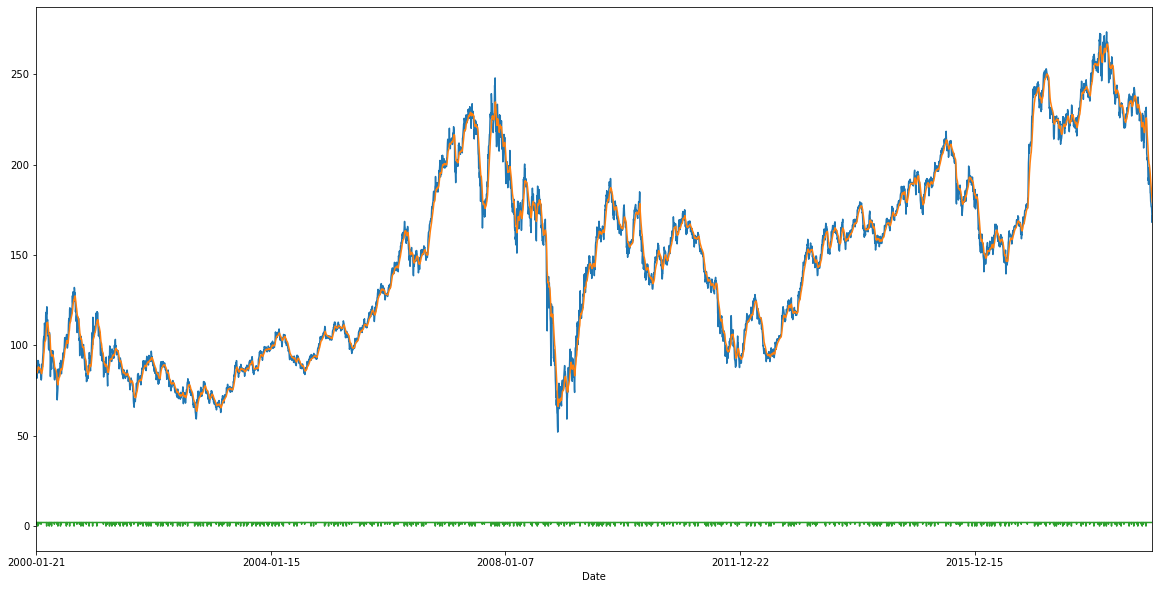

In [64]:
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

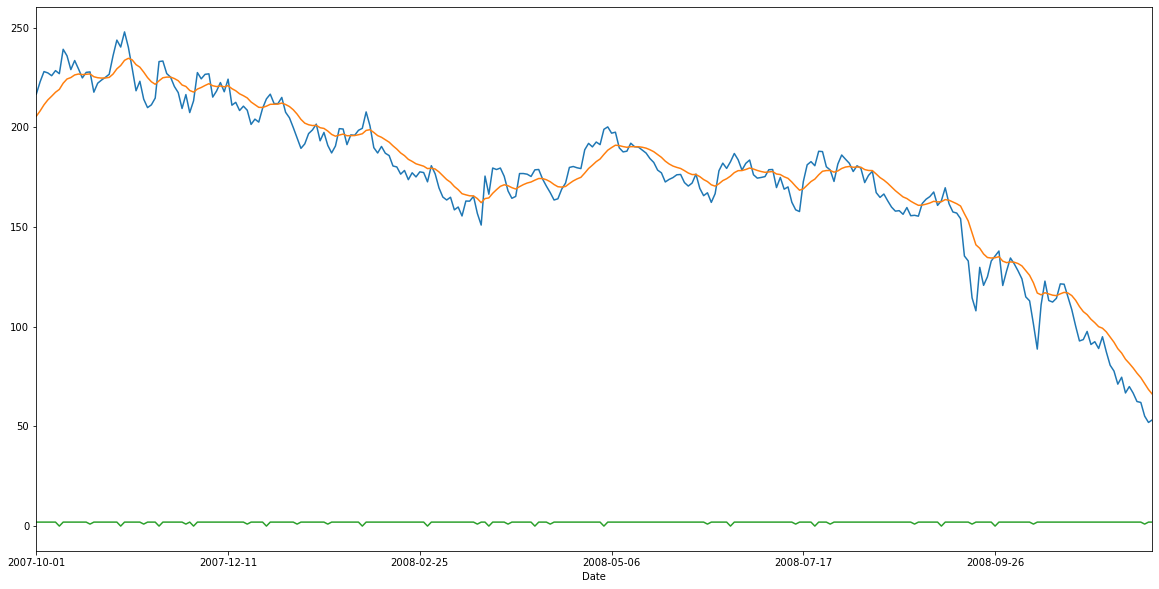

In [65]:
df = df.loc['2007-10-01':'2008-11-24']
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 292 entries, 2007-10-01 to 2008-11-24
Data columns (total 5 columns):
previous_1d    292 non-null float64
EMA_12         292 non-null float64
willr_14       292 non-null float64
OBV_7          292 non-null float64
labels         292 non-null float64
dtypes: float64(5)
memory usage: 13.7+ KB


In [67]:
df.to_csv('mark down phase data/test_acc_data.csv')